In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize,  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical 
from keras.layers.normalization import BatchNormalization

Next we will import all the required libraries. As we are making a CNN model we will import all the required layers, activations, optimizers, etc.  

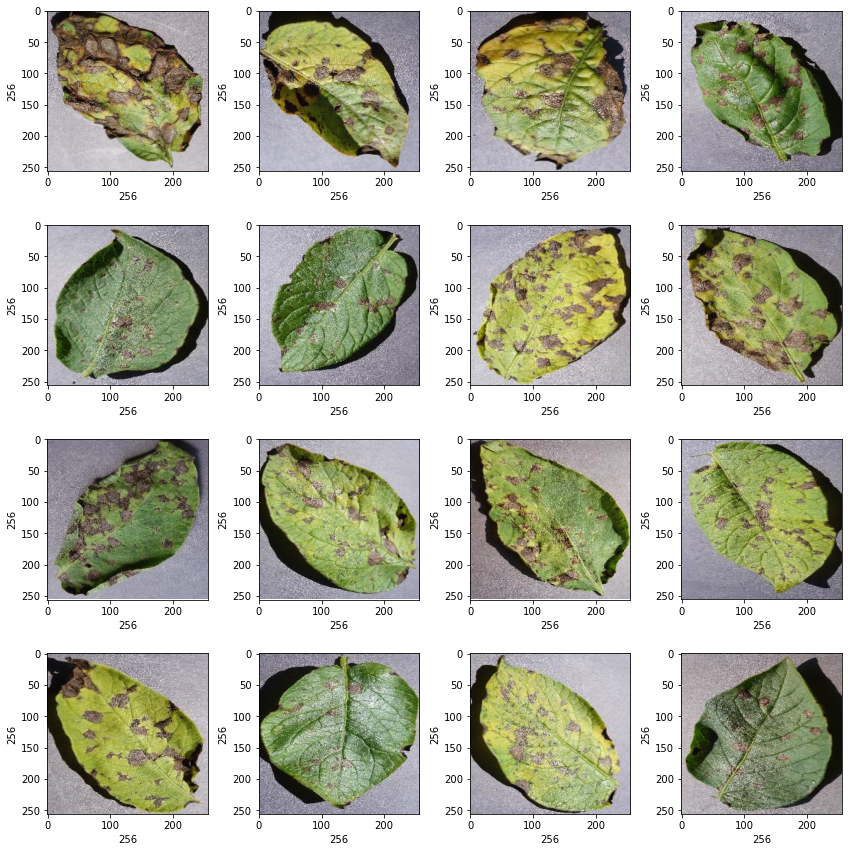

In [2]:
# Plotting 16 images to check dataset
plt.figure(figsize=(12,12))
path = "D:\AMJ\Folium\Data\Plant_images_pianalytix_1/Potato___Early_blight"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

Now we will observe some of the iamges that are their in our dataset. We will plot 12 images here using the matplotlib library.

In [3]:
#Converting Images to array 
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256,256))  
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None
def convert_image_to_BGR(image_dir):
    main_img = cv2.imread(image_dir)
    img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
def convert_image_to_gray_scale(image_dir):
    main_img = cv2.imread(image_dir)
    img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
    gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    plt.imshow(gs,cmap='Greys_r')
    
def convert_image_to_blur(image_dir):
    main_img = cv2.imread(image_dir)
    img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
    gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gs, (25,25),0)
    plt.imshow(blur,cmap='Greys_r')

def convert_image_to_cmap(image_dir):
    main_img = cv2.imread(image_dir)
    img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
    gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gs, (25,25),0)
    ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    plt.imshow(im_bw_otsu,cmap='Greys_r')

def convert_image_to_closing_cmap(image_dir):
    main_img = cv2.imread(image_dir)
    img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
    gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gs, (25,25),0)
    ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel = np.ones((50,50),np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
    plt.imshow(closing,cmap='Greys_r')

def convert_image_to_Boundary_extraction(image_dir):
    main_img = cv2.imread(image_dir)
    img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
    gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gs, (25,25),0)
    ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel = np.ones((50,50),np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
    sobelx64f = cv2.Sobel(closing,cv2.CV_64F,1,0,ksize=5)
    abs_sobel64f = np.absolute(sobelx64f)
    sobel_8u = np.uint8(abs_sobel64f)
    plt.imshow(abs_sobel64f,cmap='Greys_r')
    
def convert_image_to_Boundary_finalization(image_dir):
    main_img = cv2.imread(image_dir)
    img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
    gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gs, (25,25),0)
    ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel = np.ones((50,50),np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
    sobelx64f = cv2.Sobel(closing,cv2.CV_64F,1,0,ksize=5)
    abs_sobel64f = np.absolute(sobelx64f)
    sobel_8u = np.uint8(abs_sobel64f)
    ret_sobel,im_bw_sobel = cv2.threshold(sobel_8u,1,255,cv2.THRESH_BINARY)
    plt.imshow(im_bw_sobel,cmap='Greys_r')
    
def convert_image_to_Boundary_extraction1(image_dir):
    main_img = cv2.imread(image_dir)
    img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
    gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gs, (25,25),0)
    ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel = np.ones((50,50),np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
    sobelx64f = cv2.Sobel(closing,cv2.CV_64F,1,0,ksize=5)
    abs_sobel64f = np.absolute(sobelx64f)
    sobel_8u = np.uint8(abs_sobel64f)
    ret_sobel,im_bw_sobel = cv2.threshold(sobel_8u,1,255,cv2.THRESH_BINARY)
    kernel_edge = np.ones((15,15),np.uint8)
    closing_edge = cv2.morphologyEx(im_bw_sobel, cv2.MORPH_CLOSE, kernel_edge)
    plt.imshow(closing_edge,cmap='Greys_r')

def convert_image_to_final(image_dir):
    main_img = cv2.imread(image_dir)
    img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
    gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gs, (25,25),0)
    ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel = np.ones((50,50),np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
    sobelx64f = cv2.Sobel(closing,cv2.CV_64F,1,0,ksize=5)
    abs_sobel64f = np.absolute(sobelx64f)
    sobel_8u = np.uint8(abs_sobel64f)
    ret_sobel,im_bw_sobel = cv2.threshold(sobel_8u,1,255,cv2.THRESH_BINARY)
    kernel_edge = np.ones((15,15),np.uint8)
    closing_edge = cv2.morphologyEx(im_bw_sobel, cv2.MORPH_CLOSE, kernel_edge)
    plt.imshow(closing,cmap="Greys_r")

def convert_image_to_plot(image_dir):
    main_img = cv2.imread(image_dir)
    img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
    gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gs, (25,25),0)
    ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel = np.ones((50,50),np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
    sobelx64f = cv2.Sobel(closing,cv2.CV_64F,1,0,ksize=5)
    abs_sobel64f = np.absolute(sobelx64f)
    sobel_8u = np.uint8(abs_sobel64f)
    ret_sobel,im_bw_sobel = cv2.threshold(sobel_8u,1,255,cv2.THRESH_BINARY)
    kernel_edge = np.ones((15,15),np.uint8)
    closing_edge = cv2.morphologyEx(im_bw_sobel, cv2.MORPH_CLOSE, kernel_edge)
    contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    len(contours)
    cnt = contours[0]
    len(cnt)
    plottedContour = cv2.drawContours(gs,contours,-1,(0,255,0),10)
    plt.imshow(plottedContour,cmap="Greys_r")

After visualizing the images let us move forward and create a function which will convert the images into a numpy array. It is required because we will normalize our dataset after this.

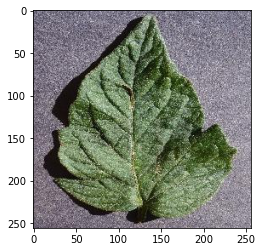

In [4]:
dir = "D:\AMJ\Folium\Data\Plant_images_pianalytix_1"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn_(maize)___Common_rust_','Corn_(maize)___healthy', 'Potato-Early_blight','Potato___healthy','Tomato-Bacterial_spot','Tomato___healthy']
binary_labels = [0,1,2,3,4,5]
temp = -1

# Reading and converting image to BGR
for directory in root_dir:
    plant_image_list = listdir(f"{dir}/{directory}")
    temp += 1
    for files in plant_image_list:
        image_path = f"{dir}/{directory}/{files}"
        #image_list.append(check_image(image_path))
        #image_list.append(convert_image_to_array(image_path))
        image_list.append(convert_image_to_BGR(image_path))
        #image_list.append(convert_image_to_gray_scale(image_path))
        label_list.append(binary_labels[temp])

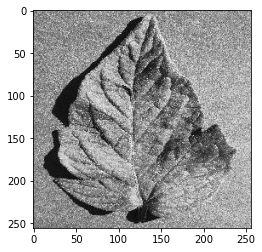

In [5]:
dir = "D:\AMJ\Folium\Data\Plant_images_pianalytix_1"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn_(maize)___Common_rust_','Corn_(maize)___healthy', 'Potato-Early_blight','Potato___healthy','Tomato-Bacterial_spot','Tomato___healthy']
binary_labels = [0,1,2,3,4,5]
temp = -1

# Reading and converting image to Gray Scale
for directory in root_dir:
    plant_image_list = listdir(f"{dir}/{directory}")
    temp += 1
    for files in plant_image_list:
        image_path = f"{dir}/{directory}/{files}"
        image_list.append(convert_image_to_gray_scale(image_path))
        label_list.append(binary_labels[temp])

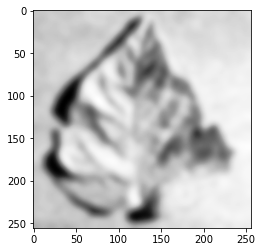

In [6]:
dir = "D:\AMJ\Folium\Data\Plant_images_pianalytix_1"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn_(maize)___Common_rust_','Corn_(maize)___healthy', 'Potato-Early_blight','Potato___healthy','Tomato-Bacterial_spot','Tomato___healthy']
binary_labels = [0,1,2,3,4,5]
temp = -1

# Reading and converting image to Blur
for directory in root_dir:
    plant_image_list = listdir(f"{dir}/{directory}")
    temp += 1
    for files in plant_image_list:
        image_path = f"{dir}/{directory}/{files}"
        image_list.append(convert_image_to_blur(image_path))
        label_list.append(binary_labels[temp])

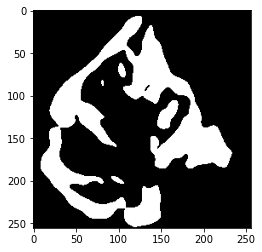

In [7]:
dir = "D:\AMJ\Folium\Data\Plant_images_pianalytix_1"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn_(maize)___Common_rust_','Corn_(maize)___healthy', 'Potato-Early_blight','Potato___healthy','Tomato-Bacterial_spot','Tomato___healthy']
binary_labels = [0,1,2,3,4,5]
temp = -1

# Reading and converting image to cmap
for directory in root_dir:
    plant_image_list = listdir(f"{dir}/{directory}")
    temp += 1
    for files in plant_image_list:
        image_path = f"{dir}/{directory}/{files}"
        image_list.append(convert_image_to_cmap(image_path))
        label_list.append(binary_labels[temp])

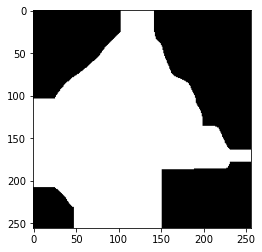

In [8]:
dir = "D:\AMJ\Folium\Data\Plant_images_pianalytix_1"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn_(maize)___Common_rust_','Corn_(maize)___healthy', 'Potato-Early_blight','Potato___healthy','Tomato-Bacterial_spot','Tomato___healthy']
binary_labels = [0,1,2,3,4,5]
temp = -1

# Reading and converting image to clasing cmap
for directory in root_dir:
    plant_image_list = listdir(f"{dir}/{directory}")
    temp += 1
    for files in plant_image_list:
        image_path = f"{dir}/{directory}/{files}"
        image_list.append(convert_image_to_closing_cmap(image_path))
        label_list.append(binary_labels[temp])

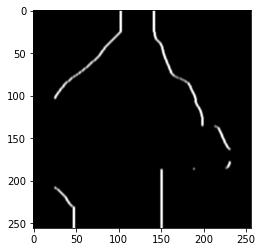

In [9]:
dir = "D:\AMJ\Folium\Data\Plant_images_pianalytix_1"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn_(maize)___Common_rust_','Corn_(maize)___healthy', 'Potato-Early_blight','Potato___healthy','Tomato-Bacterial_spot','Tomato___healthy']
binary_labels = [0,1,2,3,4,5]
temp = -1

# Reading and converting boundary extraction 
for directory in root_dir:
    plant_image_list = listdir(f"{dir}/{directory}")
    temp += 1
    for files in plant_image_list:
        image_path = f"{dir}/{directory}/{files}"
        image_list.append(convert_image_to_Boundary_extraction(image_path))
        label_list.append(binary_labels[temp])

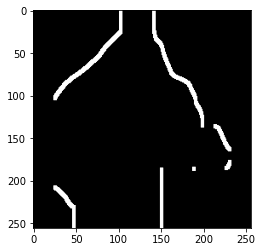

In [10]:
dir = "D:\AMJ\Folium\Data\Plant_images_pianalytix_1"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn_(maize)___Common_rust_','Corn_(maize)___healthy', 'Potato-Early_blight','Potato___healthy','Tomato-Bacterial_spot','Tomato___healthy']
binary_labels = [0,1,2,3,4,5]
temp = -1

# Reading and boundary finalization
for directory in root_dir:
    plant_image_list = listdir(f"{dir}/{directory}")
    temp += 1
    for files in plant_image_list:
        image_path = f"{dir}/{directory}/{files}"
        image_list.append(convert_image_to_Boundary_finalization(image_path))
        label_list.append(binary_labels[temp])

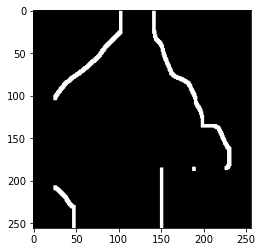

In [11]:
dir = "D:\AMJ\Folium\Data\Plant_images_pianalytix_1"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn_(maize)___Common_rust_','Corn_(maize)___healthy', 'Potato-Early_blight','Potato___healthy','Tomato-Bacterial_spot','Tomato___healthy']
binary_labels = [0,1,2,3,4,5]
temp = -1

# Reading and extraction of image
for directory in root_dir:
    plant_image_list = listdir(f"{dir}/{directory}")
    temp += 1
    for files in plant_image_list:
        image_path = f"{dir}/{directory}/{files}"
        image_list.append(convert_image_to_Boundary_extraction1(image_path))
        label_list.append(binary_labels[temp])

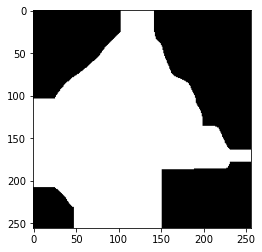

In [12]:
dir = "D:\AMJ\Folium\Data\Plant_images_pianalytix_1"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn_(maize)___Common_rust_','Corn_(maize)___healthy', 'Potato-Early_blight','Potato___healthy','Tomato-Bacterial_spot','Tomato___healthy']
binary_labels = [0,1,2,3,4,5]
temp = -1

# Reading and converting image to final image
for directory in root_dir:
    plant_image_list = listdir(f"{dir}/{directory}")
    temp += 1
    for files in plant_image_list:
        image_path = f"{dir}/{directory}/{files}"
        image_list.append(convert_image_to_final(image_path))
        label_list.append(binary_labels[temp])

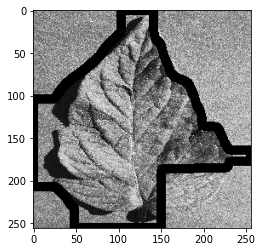

In [13]:
dir = "D:\AMJ\Folium\Data\Plant_images_pianalytix_1"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn_(maize)___Common_rust_','Corn_(maize)___healthy', 'Potato-Early_blight','Potato___healthy','Tomato-Bacterial_spot','Tomato___healthy']
binary_labels = [0,1,2,3,4,5]
temp = -1

# Reading and plot image
for directory in root_dir:
    plant_image_list = listdir(f"{dir}/{directory}")
    temp += 1
    for files in plant_image_list:
        image_path = f"{dir}/{directory}/{files}"
        image_list.append(convert_image_to_plot(image_path))
        label_list.append(binary_labels[temp])

Now we will convert all the images into numpy array.

In [14]:
dir = "D:\AMJ\Folium\Data\Plant_images_pianalytix_1"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn_(maize)___Common_rust_','Corn_(maize)___healthy', 'Potato-Early_blight','Potato___healthy','Tomato-Bacterial_spot','Tomato___healthy']
binary_labels = [0,1,2,3,4,5]
temp = -1

# Reading and converting image to numpy array
for directory in root_dir:
    plant_image_list = listdir(f"{dir}/{directory}")
    temp += 1
    for files in plant_image_list:
        image_path = f"{dir}/{directory}/{files}"
        #image_list.append(check_image(image_path))
        image_list.append(convert_image_to_array(image_path))
        #image_list.append(convert_image_to_BGR(image_path))
        #image_list.append(convert_image_to_gray_scale(image_path))
        label_list.append(binary_labels[temp])

In [15]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
dtype: int64

We will also observe the number of images under different classes to see if the dataset is balanced or not

In [16]:
image_list[0].shape

(256, 256, 3)

Next we will observe the shape of the image.

In [17]:
label_list = np.array(label_list)
label_list.shape

(6000,)

Checking the total number of the images which is the length of the labels list.

In [18]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10) 

Next we will use sklearn train_test_split to split the dataset into testing and training data. Here I have taken test size as 0.2 so my data will be divided into 80% training and 20% testing data.

In [19]:
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 256,256,3)
x_test = x_test.reshape( -1, 256,256,3)

Now we will normalize the dataset of our images. As pixel values ranges from 0 to 255 so we will divide each image pixel with 255 to normalize the dataset.

In [20]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [22]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
BatchNormalization()
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
BatchNormalization()
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
BatchNormalization()
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(64, (2, 2), padding="same", activation="relu"))
BatchNormalization()
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dense(6, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 85, 85, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 85, 85, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)       

Next we will create a network architecture for the model. We have used different types of layers according to their features namely Conv_2d (It is used to create a convolutional kernel that is convolved with the input layer to produce the output tensor), max_pooling2d (It is a downsampling technique which takes out the maximum value over the window defined by poolsize), flatten (It flattens the input and creates a 1D output), Dense (Dense layer produce the output as the dot product of input and kernel).


In [23]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

While compiling the model we need to set the type of loss which will be Binary Crossentropy for our model alongwith this we also need to set the optimizer and the metrics respectively.

In [24]:
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

Next we will split the dataset into validation and training data.

In [25]:
# Training the model
epochs = 40
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, 
                    validation_data = (x_val, y_val))

Epoch 1/40
30/30 [==============================] - 166s 6s/step - loss: 1.7662 - accuracy: 0.2073 - val_loss: 1.7633 - val_accuracy: 0.4083
Epoch 2/40
30/30 [==============================] - 172s 6s/step - loss: 1.6509 - accuracy: 0.3396 - val_loss: 1.6478 - val_accuracy: 0.5375
Epoch 3/40
30/30 [==============================] - 160s 5s/step - loss: 1.2920 - accuracy: 0.5630 - val_loss: 1.2190 - val_accuracy: 0.7958
Epoch 4/40
30/30 [==============================] - 157s 5s/step - loss: 0.8770 - accuracy: 0.7065 - val_loss: 0.8475 - val_accuracy: 0.8385
Epoch 5/40
30/30 [==============================] - 160s 5s/step - loss: 0.6435 - accuracy: 0.7820 - val_loss: 0.6547 - val_accuracy: 0.8698
Epoch 6/40
30/30 [==============================] - 184s 6s/step - loss: 0.5176 - accuracy: 0.8391 - val_loss: 0.5482 - val_accuracy: 0.8813
Epoch 7/40
30/30 [==============================] - 211s 7s/step - loss: 0.4345 - accuracy: 0.8641 - val_loss: 0.5190 - val_accuracy: 0.8687
Epoch 8/40
30

In [26]:
model.save("D:/AMJ/Folium/Model/plant_disease.h5")
# serialize model to json
json_model = model.to_json()
#save the model architecture to JSON file
with open('D:/AMJ/Folium/Model/plant_model.json', 'w') as json_file:
    json_file.write(json_model)
#saving the weights of the model
model.save_weights('D:/AMJ/Folium/Model/plant_model_weights.h5')

Saving the model using different techniques.

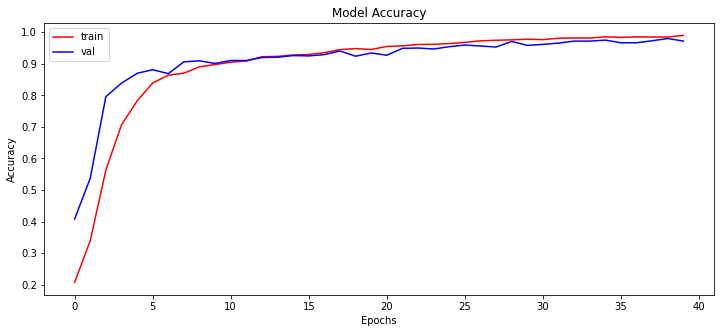

In [27]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

Next we will plot the accuracy of the model for the trainig history.

In [28]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
38/38 [==============================] - 6s 145ms/step - loss: 0.0865 - accuracy: 0.9767
Test Accuracy: 97.66666889190674


Evaluating the model to know the accuracy of the model.


In [29]:
y_pred = model.predict(x_test)

Next we will use our model to predict predicting the testing dataset label.

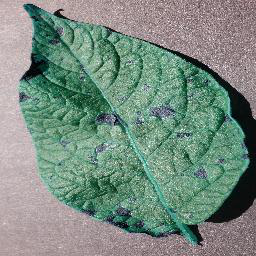

In [40]:
# Plotting image to compare
img = array_to_img(x_test[155])
img

In [39]:
# Finding max value from predition list and comaparing original value vs predicted_(1199)
print("Originally : ",all_labels[np.argmax(y_test[99])])
print("Predicted : ",all_labels[np.argmax(y_pred[99])])

Originally :  Tomato-Bacterial_spot
Predicted :  Tomato-Bacterial_spot


In [1]:
import cv2
import numpy as np
#"C:/Users/Lenovo/Desktop/1.JPG"
#"C:/Users/Lenovo/Desktop/passport.png"
# Load the image
#img = array_to_img(x_test)
img = cv2.imread("C:/Users/Lenovo/Desktop/passport.png")

# Convert the image to grayscale
gray = cv2.cvtColor(np.float32(img), cv2.COLOR_BGR2GRAY)

# Apply a Gaussian blur to reduce noise
blur = cv2.GaussianBlur(np.float32(gray), (5, 5), 0)

# Threshold the image to create a binary image
ret, thresh = cv2.threshold(np.float32(blur), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Find contours in the binary image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Find the largest contour
if len(contours) > 0:
    largest_contour = max(contours, key=cv2.contourArea)

    # Compute the area and perimeter of the largest contour
    area = cv2.contourArea(largest_contour)
    perimeter = cv2.arcLength(largest_contour, True)

    # Compute the circularity of the largest contour
    circularity = (4 * np.pi * area) / (perimeter * perimeter)

    # Check if the circularity is within a range to determine if it's a leaf or not
    if 0.7 < circularity < 0.9:
        print("The image is a leaf.")
    else:
        print("The image is not a leaf.")
else:
    print("No contour found in the image.")

error: OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\thresh.cpp:1389: error: (-215:Assertion failed) src.type() == CV_8UC1 in function 'cv::threshold'


error: OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [18]:
import json
# We mostly care about the x and y coordinates of each region
        
        #annotations1 = json.load(open('D:/python3.6.8_tensorflow_1.14_env/maskrcnn_leave_disease_detection/dataset/train/train.json'))
#annotations1 = json.load(open(os.path.join(dir, 'train.json')))
        #keep the name of the json files in the both train and val folders
        
        # print(annotations1)
annotations = list(annotations1.values())  # don't need the dict keys



        # The VIA tool saves images in the JSON even if they don't have any
        # annotations. Skip unannotated images.
annotations = [a for a in annotations if a['regions']]

for a in annotations:
            # print(a)
            # Get the x, y coordinaets of points of the polygons that make up
            # the outline of each object instance. There are stores in the
            # shape_attributes (see json format above)
            polygons = [r['shape_attributes'] for r in a['regions']] 
            objects = [s['region_attributes']['names'] for s in a['regions']]
            print("objects:",objects)
            name_dict = {"Apple_Black_Rot": 1,"Apple_Healthy": 2,"Apple_Rust": 3,"Apple_Scab":4,"Blueberry_Healthy":5,"Corn_Common_Rust":6,"Corn_Gray_Leaf_Spot":7,"Corn_Healthy":8,"Grape_Black_Measles":9,"Grape_Black_Rot":10,"Grape_Healthy":11,"Peach_Bacterial_Spot":12,"Peach_Healthy":13,"Pepper_Bell_Bacterial_Spot":14,"Pepper_Bell_Healthy":15,"Pepper_Early_Blight":16,"Potato_Healthy":17,"Potato_Late_Blight":18,"Rasberry_Healthy":19,"Soybean_Healthy":20,"Strawberry_Leaf_Scroch":21,"Strawberry_Healthy":22,"Tomato_Bacterial_Spot":23,"Tomato_Early_Blight":24,"Tomato_Healthy":25,"Tomato_Late_Blight":26,"Tomato_Leaf_Spot":27,"Tomato_Target_Spot":28}
            #name_dict = {"Horse": 1,"Man": 2} #,"xyz": 3}
            # key = tuple(name_dict)
            num_ids = [name_dict[a] for a in objects]
     
            # num_ids = [int(n['Event']) for n in objects]
            # load_mask() needs the image size to convert polygons to masks.
            # Unfortunately, VIA doesn't include it in JSON, so we must read
            # the image. This is only managable since the dataset is tiny.
            print("numids",num_ids)
            image_path = os.path.join(dataset_dir, a['filename'])
            image = skimage.io.imread(image_path)
            height, width = image.shape[:2]

            self.add_image(
                "object",  ## for a single class just add the name here
                image_id=a['filename'],  # use file name as a unique image id
                path=image_path,
                width=width, height=height,
                polygons=polygons,
                num_ids=num_ids
                )

def load_mask(image_dir):
        """Generate instance masks for an image.
       Returns:
        masks: A bool array of shape [height, width, instance count] with
            one mask per instance.
        class_ids: a 1D array of class IDs of the instance masks.
        """
        # If not a Dog-Cat dataset image, delegate to parent class.
        image_info = self.image_info[image_dir]
        if image_info["source"] != "object":
            return super(self.__class__, self).load_mask(image_dir)

        # Convert polygons to a bitmap mask of shape
        # [height, width, instance_count]
        info = self.image_info[image_dir]
        if info["source"] != "object":
            return super(self.__class__, self).load_mask(image_dir)
        num_ids = info['num_ids']
        mask = np.zeros([info["height"], info["width"], len(info["polygons"])],
                        dtype=np.uint8)
        for i, p in enumerate(info["polygons"]):
            # Get indexes of pixels inside the polygon and set them to 1
        	rr, cc = skimage.draw.polygon(p['all_points_y'], p['all_points_x'])

        	mask[rr, cc, i] = 1

        # Return mask, and array of class IDs of each instance. Since we have
        # one class ID only, we return an array of 1s
        # Map class names to class IDs.
        num_ids = np.array(num_ids, dtype=np.int32)
        return mask, num_ids #np.ones([mask.shape[-1]], dtype=np.int32)

NameError: name 'annotations1' is not defined

In [11]:
dir = "D:\AMJ\Folium\Data\Plant_images_pianalytix_1"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn_(maize)___Common_rust_','Corn_(maize)___healthy', 'Potato-Early_blight','Potato___healthy','Tomato-Bacterial_spot','Tomato___healthy']
binary_labels = [0,1,2,3,4,5]
temp = -1

# Reading and converting image to numpy array
for directory in root_dir:
    plant_image_list = listdir(f"{dir}/{directory}")
    temp += 1
    for files in plant_image_list:
        image_path = f"{dir}/{directory}/{files}"
        #image_list.append(check_image(image_path))
        #image_list.append(convert_image_to_array(image_path))
        image_list.append(load_mask(image_path))
        #image_list.append(convert_image_to_gray_scale(image_path))
        label_list.append(binary_labels[temp])

NameError: name 'self' is not defined

In [11]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(256,256,3)))
model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))

model.add(keras.layers.Conv2D(256,(5,5),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(256,(5,5),activation="relu",padding="same"))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(512,activation="relu"))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(6,activation="softmax"))

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 85, 85, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 85, 85, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 128)       7

In [24]:
model = Sequential()

inputShape = (256,256,3)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (256,256,3)
    chanDim = 1

#chanDim = 1
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(6))
model.add(Activation("softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 256, 256, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 32)      1024      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 85, 85, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 85, 85, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 85, 85, 64)        0